# Aeroblade Deep Learning Project

### Import libraries:


In [1]:
!pip install --user pandas numpy scikit-learn tensorflow matplotlib ipywidgets seaborn scipy
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Normalization
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from ipywidgets import interact, widgets
import seaborn as sns

### Read simulation data
The data is read from a csv file into a pandas dataframe.
The pandas dataframe is one of the standard input formats for most machine learning frameworks in python.
Columns from the csv file are stored in named columns in the dataframe.
Columns can be accessed by name or by index.
Rows can be accessed by index.

We print the dataframe to see if we imported the csv file correctly.

In [2]:
file_path = r"Ergebnisse_K_Aeroblade.csv"  # Update this path 
df = pd.read_csv(file_path, delimiter = ';', decimal = ',')
print(df)

   x1  x2  x3  x4  x5  x6  x7  x8  x9  x10         k1         k3       k10
0   0   0   0   0   0   0   0   0   0    5  25.604449   3.857463  0.799238
1   1   1   1   1   1   1   1   1   1    1  53.445458   7.004502  1.378162
2   1   1   1   1   1   5   4   4   5    5  49.870057   6.820980  1.350195
3   2   3   2   5   5   5   2   3   5    5  54.771092   7.056818  1.386991
4   4   3   5   2   3   5   5   2   3    5  89.069930  11.498498  2.294846
5   4   3   5   5   1   3   5   2   5    3  89.192986  11.500624  2.294473
6   4   3   5   5   2   5   3   5   4    5  88.454038  11.436876  2.282708
7   4   5   3   2   5   5   4   4   5    5  86.734083  11.162186  2.225755
8   4   5   3   5   5   5   5   5   4    5  85.350071  10.990942  2.190321
9   4   5   5   3   5   5   4   5   4    5  84.408820  10.852534  2.161419


### Data Review
seaborn (sns) is used to create plots for data analysis.

#### Histograms
Histograms show the distribution of values for one column in the dataframe.
the code creates a histogram that counts the number of values that fall between 0 and 1, 1 and 2, 2 and 3
Histograms are used to detect imbalances in the dataset.

#### Correlation Matrices
Correlation matrices match every column of the dataframe with each other and calculate the correlation.
**pearson** is used for linear correlations.
**spearman** is used for simple nonlinear correlations.
Parameters that strongly correlate with one another should not be used together as model inputs.
Input parameters which correlate with output parameters should be used as inputs for the model. But weak correlation in the matrix does not mean a parameter should not be used as input, since the actual correlations might be more complex and depend on multiple parameters.

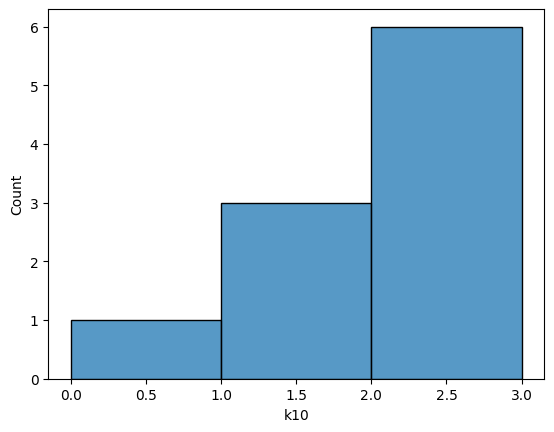

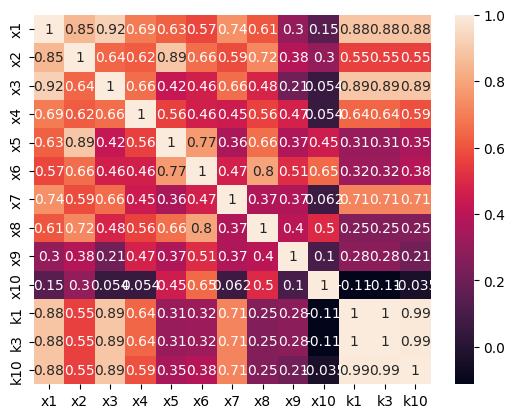

In [3]:
sns.histplot(df['k10'], bins = [0, 1, 2, 3])
plt.show()

sns.heatmap(df.corr(method='spearman'), annot=True)
plt.show()

#### Data Split
First, we remove the columns we don't want to use from the dataset using drop.
In this case, we split the data manually, and assign the rows systematically. We can do that because we know the data was randomly sampled. If the data was sampled systematically, we would use a randomizer to assign datapoints to the split sets.

In [4]:
df = df.drop(columns=['k1', 'k3',])
training_data = df.iloc[0:6]
val_data = df.iloc[6:8]
test_data = df.iloc[8:]
print(training_data)
print(val_data)
print(test_data)

   x1  x2  x3  x4  x5  x6  x7  x8  x9  x10       k10
0   0   0   0   0   0   0   0   0   0    5  0.799238
1   1   1   1   1   1   1   1   1   1    1  1.378162
2   1   1   1   1   1   5   4   4   5    5  1.350195
3   2   3   2   5   5   5   2   3   5    5  1.386991
4   4   3   5   2   3   5   5   2   3    5  2.294846
5   4   3   5   5   1   3   5   2   5    3  2.294473
   x1  x2  x3  x4  x5  x6  x7  x8  x9  x10       k10
6   4   3   5   5   2   5   3   5   4    5  2.282708
7   4   5   3   2   5   5   4   4   5    5  2.225755
   x1  x2  x3  x4  x5  x6  x7  x8  x9  x10       k10
8   4   5   3   5   5   5   5   5   4    5  2.190321
9   4   5   5   3   5   5   4   5   4    5  2.161419


#### Model Architecture
This bracket determines the neural networks architecture. <br>
First, the training inputs are selected are selected and stored in a separate variable.
The training inputs are then used to calibrate a **normalization layer** for the neural network. <br>
The normalization layer transforms all incoming data, so that the originally selected input has a mean of 0 and a standard deviation of 1. <br>

Inside **Sequential** we define the model architecture itself. Using Sequential, we can define as many layers as necessary in a simple sequence. <br>
The current model has one predefined **input layer** matching our input data. <br>
It is followed by the **normalization layer**, which we calibrated earlier. <br>
The next three lines are deactivated (turned into comments). To activate them remove the # sign.<br>
**Dense** layers are densely connected feedforward layers. The first number sets the number of neurons for that layer, activation sets the activation function for that layer. <br>
One of the dense layers has a regularizer. Regularizers prevent overfitting, by forcing the optimizer to use small values for the neural networks weights. <br>
The final dense layer uses a linear activation function (the same as no activation function) and serves as the networks output layer. <br>
One of the comments is a **dropout** layer. Dropout layers mitigate overfitting, by randomly deactivating a fraction of the following layers neurons. <br><br>

Inside compile the optimizer and the loss function are set. Metrics use loss functions to evaluate model performance and accuracy, but are not used for training. <br>
Useful optimizers for this case are: 'adam', and 'SGD' (stochastic gradient descent) <br>
Useful loss functions are 'mse' (mean squared error), 'mae' (mean absolute error), 'mape' (mean absolute percentage error)



In [5]:
training_input = training_data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',]]

normalization = Normalization()
normalization.adapt(training_input.to_numpy())

model = Sequential([   
    Input(shape=(training_data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',]].shape[1],)),  
    normalization,
    #Dense(32, activation='relu'),
    #Dense(32, activation='relu'),
    #keras.layers.Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer= keras.regularizers.l2(0.01)),
    Dense(1)  # Output layer for regression (predicting downforce)
])

print(model.summary())

model.compile(optimizer='adam', loss='mse', metrics=['mape'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 406
Trainable params: 385
Non-trainable params: 21
_________________________________________________________________
None


#### Fitting and Evaluation
This brackets trains the model. First the training and the validation datasets are defined. <br>
The most important parameter here is **epochs**. This is the number of training iterations for the optimizer. Increase epochs if the model does not fit properly. Decrease if it overfits. <br>
Run this bracket multiple times to see random initialization changes the model in each training attempt.

Epoch 1/100
1/1 [==============================] - 0s 463ms/step - loss: 5.5603 - mape: 142.2132 - val_loss: 8.8133 - val_mape: 130.3386
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 5.4231 - mape: 140.3641 - val_loss: 8.5104 - val_mape: 128.0243
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 5.2881 - mape: 138.5180 - val_loss: 8.2138 - val_mape: 125.7170
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 5.1552 - mape: 136.6753 - val_loss: 7.9238 - val_mape: 123.4186
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 5.0245 - mape: 134.8365 - val_loss: 7.6406 - val_mape: 121.1315
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 4.8960 - mape: 133.0017 - val_loss: 7.3642 - val_mape: 118.8571
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 4.7699 - mape: 131.1755 - val_loss: 7.0946 - val_mape: 116.5954
Epoch 8/100
1/1 [==============================

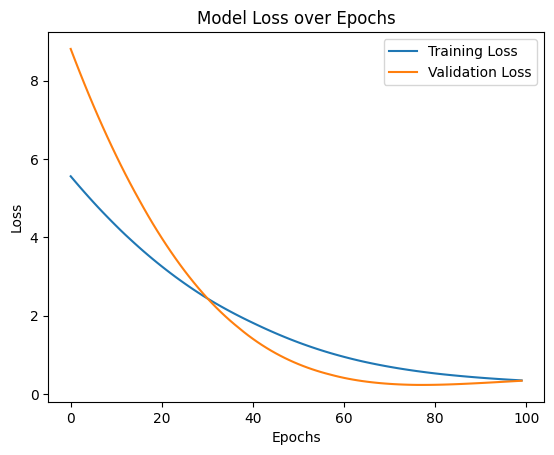

In [6]:
history = model.fit(
    training_data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',]], training_data[['k10']],
    validation_data=(val_data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',]], val_data[['k10']]),
    epochs=100,
    #batch_size=32,
    verbose=1
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

#### Test Evaluation
This bracket evalutes the model with the selected test data. Check this metric only after settling on a preliminary model architecture to avoid model bias.

In [7]:
test_loss, test_metrics = model.evaluate(test_data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',]], test_data['k10'])
print(test_metrics)

1/1 [==============================] - 0s 77ms/step - loss: 0.8406 - mape: 38.5300
38.52997589111328


#### Prediction
This line of code predicts and prints the k10 value for the selected mesh configuration. This how the ML model is used in practice.

In [8]:
print(model.predict(np.array([[0,0,5,5,0,5,0,0,0,5]])))

1/1 [==============================] - 0s 52ms/step
[[0.06067429]]


#### Active Sampling
This is a very simple approach to active sampling. We create 10 models of the same architecture and predict the k10 value of 1000 different configurations. We calculate the variance of the predictions to see where the models disagree the most (query-by-comittee). That configuratio is what we would simulate next and add to our dataset. <br>
(Please note that this approach to active sampling is simplified to reduce computational time)

In [9]:
# Set the seed for reproducibility
np.random.seed(42)

# Define the number of samples and the shape of each sample
num_samples = 1000
sample_shape = 10

# Generate 1000 random samples with integers between 0 and 5 (inclusive)
input_data = np.random.randint(0, 6, size=(num_samples, sample_shape))

print(input_data)

models = []
for i in range(10):
    model.fit(
    training_data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',]], training_data[['k10']],
    validation_data=(val_data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',]], val_data[['k10']]),
    epochs=10,
    #batch_size=32,
    verbose=0
)
    models.append(model)

# Generate predictions for each model
all_predictions = []

for model in models:
    # Get the predictions for the 1000 inputs
    predictions = model.predict(input_data)
    all_predictions.append(predictions)

# Convert the list of predictions to a numpy array
# Shape will be (10, 1000, output_shape) if output is multi-dimensional, otherwise (10, 1000)
all_predictions = np.array(all_predictions)

# Calculate variance along the axis of models (axis=0)
# This calculates the variance for each of the 1000 inputs across the 10 models
variance = np.var(all_predictions, axis=0)

# Find the index of the maximum variance
max_variance_index = np.argmax(variance)

# Retrieve the value of the maximum variance
max_variance_value = variance[max_variance_index]

# Retrieve the input vector at this index
input_vector_at_max_variance = input_data[max_variance_index]

# Print the results
print(f"Maximum variance value: {max_variance_value}")
print(f"Maximum variance configuration: {input_vector_at_max_variance}")

[[3 4 2 ... 2 2 4]
 [3 2 5 ... 5 1 3]
 [4 0 3 ... 0 0 2]
 ...
 [3 3 0 ... 0 4 0]
 [1 3 1 ... 2 2 4]
 [3 3 1 ... 1 1 3]]
32/32 [==============================] - 0s 640us/step
Maximum variance value: [2.2737368e-13]
Maximum variance configuration: [5 4 5 5 3 5 2 5 5 5]


#### Save and Load
The next brackets are used to save a model to a file and load it again in another script.

In [10]:
model.save('model.keras')

In [11]:
loaded_model = keras.models.load_model('model.keras')
print(loaded_model.predict(np.array([[0,0,5,5,0,5,0,0,0,5]])))

1/1 [==============================] - 0s 33ms/step
[[-0.12115749]]
